# Homework 3: To classify the test images by training a convolutional neural network using training images and labels

In [0]:
# Helper Libraries
import pandas as pd
from pandas import Series, DataFrame
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import shuffle
import numpy as np
import matplotlib.pyplot as plt
import math
#import cPickle


In [0]:
#Convolution layer definition( Reference: Mehmets code )
def conv_layer(input_data, num_input_channels, num_filters, filter_shape, pool_shape, name):
    # setup the filter input shape for tf.nn.conv_2d
    conv_filt_shape = [filter_shape[0], filter_shape[1], num_input_channels, num_filters]

    # initialise weights and bias for the filter
    weights = tf.Variable(tf.truncated_normal(conv_filt_shape, stddev=0.03), name=name+'_W')
    bias = tf.Variable(tf.truncated_normal([num_filters]), name=name+'_b')

    # setup the convolutional layer operation
    out_layer = tf.nn.conv2d(input_data, weights, [1, 1, 1, 1], padding='SAME')

    # add the bias
    out_layer += bias

    # apply a ReLU non-linear activation
    out_layer = tf.nn.relu(out_layer)

    # now perform max pooling
    # ksize is the argument which defines the size of the max pooling window (i.e. the area over which the maximum is
    # calculated).  It must be 4D to match the convolution - in this case, for each image we want to use a 2 x 2 area
    # applied to each channel
    ksize = [1, pool_shape[0], pool_shape[1], 1]
    # strides defines how the max pooling area moves through the image - a stride of 2 in the x direction will lead to
    # max pooling areas starting at x=0, x=2, x=4 etc. through your image.  If the stride is 1, we will get max pooling
    # overlapping previous max pooling areas (and no reduction in the number of parameters).  In this case, we want
    # to do strides of 2 in the x and y directions.
    strides = [1, 2, 2, 1]
    out_layer = tf.nn.max_pool(out_layer, ksize=ksize, strides=strides, padding='SAME')

    return out_layer

In [0]:
#the coefficients of the first 5 filters in the 1st and 2nd convolutional layers as images after training is done, on a single figure as subplots.
def plotfilter(u):
    filters = u.shape[3]
    plt.figure(1, figsize=(20,20))
    n_columns = 6
    n_rows = math.ceil(filters / n_columns) + 1
    
    for i in range(1,6):
        plt.subplot(n_rows, n_columns, i+1)
        plt.title('Filter ' + str(i))
        plt.grid('off')
        plt.imshow(u[0,:,:,i], interpolation="nearest", cmap='rainbow_r')

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a Lab


 Classification accuracy:0.5736

Training complete!


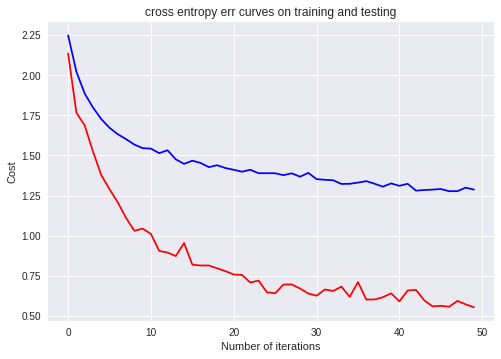

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


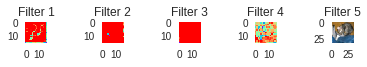

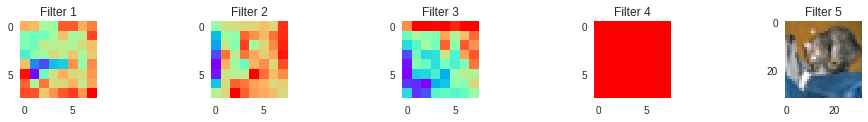

In [14]:
# definition for main function including Convolution neural networks, kernels as well as hidden layers  ( Reference: Mehemets code)
def run_cnn():
    '''def read_file():

    # starting index of image array
    begin = 0

    # declare image array which will contain all the images
    # declare cls array which will contain all labels
    train_images = np.zeros(shape=[num_images_train, img_size * img_size * num_channels], dtype=float)
    train_cls = np.zeros(shape=[num_images_train], dtype=int)

    # read training data
    for i in range(num_train_files):
        train_filename = ('./cifar-10-batches-py/data_batch_') + str(i+1)
        print(train_filename)
        train_filePath = open(train_filename, mode = 'rb')
        train_data_dict = cPickle.load(train_filePath)

        # get the keys of the files
        print((train_data_dict.keys()))

        # from files get training data and class labels
        training_data = train_data_dict['data']
        training_labels = train_data_dict['labels']
        # print(training_data)
        # print(training_labels)

        # Convert the raw images from the data-files to floating-points.
        img = np.array(training_data, dtype=float) / 255.0

        # number of images in this batch
        num_images = len(training_data)

        # end-index for the current batch
        end = begin + num_images

        train_images[begin:end, ] = img
        train_cls[begin:end] = training_labels

        # the begin-index for the next batch is the current end-index
        begin = end

    # read testing data
    test_filename = ('./cifar-10-batches-py/test_batch')
    test_filePath = open(test_filename, mode = 'rb')
    test_data_dict = cPickle.load(test_filePath)

    # from files get testing data and class labels
    testing_data = test_data_dict['data']
    testing_labels = test_data_dict['labels']

    # Convert the raw images from the data-files to floating-points.
    test_img = np.array(testing_data, dtype=float) / 255.0

    return train_images, np.eye(10)[train_cls], test_img, np.eye(10)[testing_labels]'''
    # data loaded directly from website, as the data extracted from above process takes long time
    (X_train, Y_train), (X_test, Y_test)=tf.keras.datasets.cifar10.load_data()  
    Y_train = OneHotEncoder().fit_transform(Y_train).toarray()
    Y_test = OneHotEncoder().fit_transform(Y_test).toarray()
    
    #mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

    # Python optimisation variables
    learning_rate = 0.00001
    epochs = 50
    batch_size = 1000
    
    graph = tf.Graph()
    with graph.as_default():
        # declare the training data placeholders
         # input x - for 32 x 32 pixels = 1024 - this is the flattened image data that is drawn from cifar10.load_data()
        x = tf.placeholder(tf.float32, [None, 32,32,3])
        # reshape the input data so that it is a 4D tensor.  The first value (-1) tells function to dynamically shape that
        # dimension based on the amount of data passed to it.  The two middle dimensions are set to the image size (i.e. 32
        # x 32).  It is RGB, this dimension is 3
        x_shaped = tf.reshape(x, [-1, 32, 32, 3])
        # now declare the output data placeholder - 10 digits
        y = tf.placeholder(tf.float32, [None, 10])
        keep_prob = tf.placeholder("float")
        # create some convolutional layers
        layer1 = conv_layer(x_shaped, 3, 64, [5, 5], [2, 2], name='layer1')
        layer2 = conv_layer(layer1, 64, 64, [5, 5], [2, 2], name='layer2')
        
        # flatten the output ready for the fully connected output stage - after two layers of stride 2 pooling, we go
        # from 32 x 32, to 16 x 16 to 8 x 8 x,y co-ordinates, but with 64 output channels.  To create the fully connected,
        # "dense" layer, the new shape needs to be [-1, 8 x 8 x 64]
        flattened = tf.reshape(layer2, [-1, 8 * 8 * 64])
    
        # setup some weights and bias values for this layer, then activate with ReLU
        wd1 = tf.Variable(tf.truncated_normal([8 * 8 * 64, 384], stddev=0.03), name='wd1')
        bd1 = tf.Variable(tf.truncated_normal([384], stddev=0.01), name='bd1')
        dense_layer1 = tf.matmul(flattened, wd1) + bd1
        dense_layer1 = tf.nn.relu(dense_layer1)
        
        # another layer with softmax activations
        wd2 = tf.Variable(tf.truncated_normal([384, 192], stddev=0.03), name='wd2')
        bd2 = tf.Variable(tf.truncated_normal([192], stddev=0.01), name='bd2')
        dense_layer2 = tf.matmul(dense_layer1, wd2) + bd2
        dense_layer2 = tf.nn.relu(dense_layer2)
        
    
        # another layer with softmax activations
        wd3 = tf.Variable(tf.truncated_normal([192, 10], stddev=0.03), name='wd3')
        bd3 = tf.Variable(tf.truncated_normal([10], stddev=0.01), name='bd3')
        dense_layer3 = tf.matmul(dense_layer2, wd3) + bd3
        y_ = tf.nn.softmax(dense_layer3)
    
    
        cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=dense_layer3, labels=y))
    
        # add an optimiser
        optimiser = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cross_entropy)
    
        # define an accuracy assessment operation
        correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    with tf.Session(graph = graph, config=tf.ConfigProto(log_device_placement=True)) as sess:
        # initialise the variables
        sess.run(tf.global_variables_initializer())
        loss_function = []
        c_t=[]
        total_batch = int(len(Y_train) / batch_size)
        def getActivations(layer,stimuli):
          # initialise the variables
                  sess.run(tf.global_variables_initializer())
                  u = sess.run(layer,feed_dict={x:np.reshape(stimuli,[1,32,32,3],order='F'),keep_prob:1.0})
                  plotfilter(u)
        for epoch in range(epochs):
            avg_cost = 0
            # Randomize data point
            X_train, Y_train = shuffle(X_train, Y_train)
            for i in range(total_batch):
                # Get pair of (X, y) of the current minibatch/chunk
                batch_x = X_train[i:i + batch_size]
                batch_y = Y_train[i:i + batch_size]
                #batch_x, batch_y = mnist.train.next_batch(batch_size=batch_size)
                _, c = sess.run([optimiser, cross_entropy], feed_dict={x: batch_x, y: batch_y})
                avg_cost += c / total_batch
            loss_function = np.append(loss_function, c);
            test_acc,ct = sess.run([accuracy,cross_entropy], feed_dict={x: X_test,y: Y_test})
            c_t=np.append(c_t,ct)
        print("\n Classification accuracy:"+str(test_acc))
       
         #Classification accuracy print
           
        print("\nTraining complete!")
        # print(sess.run(accuracy, feed_dict={x: X_test, y: Y_test}))
        plt.plot((np.arange(0,len(loss_function),1)),loss_function, 'r')
        plt.plot((np.arange(0,len(c_t),1)), c_t, 'b')
    #plt.plot(c_t)
        plt.title('cross entropy err curves on training and testing')
        plt.xlabel('Number of iterations')
        plt.ylabel('Cost')
        plt.show()
    
        imageToUse = X_test[0]
        plt.grid('off')
        plt.imshow(np.reshape(imageToUse,[32,32,3]), interpolation="nearest", cmap='rainbow_r')
        
    #Activation of 1st CN layer.( Reference: Web) 
        getActivations(layer1,imageToUse)
        plt.imshow(imageToUse,cmap='rainbow_r')
        plt.show()
        getActivations(layer2,imageToUse)
        plt.imshow(imageToUse,cmap='rainbow_r')
        plt.show()
            
        #plt.plot(loss_function, label='Cost')
       # plt.xlabel('Number of iterations')
       # plt.ylabel('Cost')
        #plt.ylim((0,1))
       # plt.show()




if __name__ == "__main__":
    run_cnn()

Goal 1 It has been Observed that the accuracy for the test set after the trainning is incresing with each epoch. Also, the accuracy obtained is  around 57%.  

Goal 2:  If I can increase the epochs, the error decreases according to the observed pattern so far on the training set. In testing set the error follows the same pattern of decreasing with epochs, but comparatively the error is more compared to training with corresponding epoch values. 

Goal 3: The coefficients of the first 5 filters in the 1st and 2nd convolutional layers as images after training is done, on a single figure as subplots are shown above. The first 4 images are unclear, where as the final one has some localised  portion of figure.